In [1]:
#Analyzing all the projects on the APpstore trying to understand which app ranks the best and why

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the dataset
data=pd.read_csv(r"C:\Users\hp\Downloads\googleplaystore.csv\googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
data.shape

(10841, 13)

In [8]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

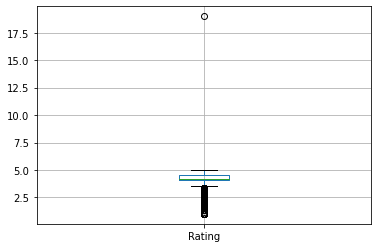

In [27]:
data.boxplot()

In [9]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
data['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [11]:
data['Type']=data['Type'].fillna('Free')

In [12]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
3.19.4                   1
8.0.9                    1
7.17.2.3                 1
4.16.2                   1
2.29.3118                1
Name: Current Ver, Length: 2832, dtype: int64

In [14]:
data['Current Ver']=data['Current Ver'].fillna('1.0')

In [15]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          0
Android Ver          3
dtype: int64

In [16]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [17]:
data['Content Rating']=data['Content Rating'].fillna('Everyone')

In [18]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          3
dtype: int64

In [19]:
data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [20]:
data['Android Ver']=data['Android Ver'].fillna('4.1 and up')

In [21]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [22]:
data.Rating=data.Rating.fillna(data.Rating.mean())

In [23]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot:>

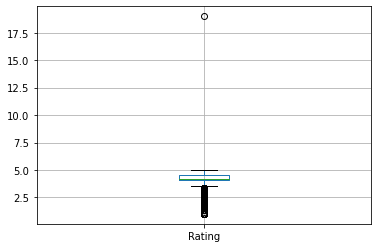

In [28]:
data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

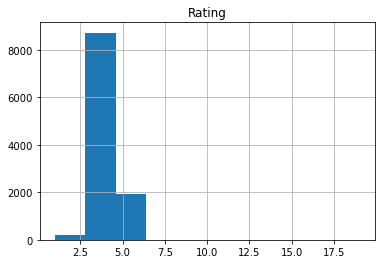

In [29]:
data.hist()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [31]:
data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
#Check how many rating are morethan 5 outlier
data[data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [35]:
data.drop([10472],inplace=True)

In [34]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

<AxesSubplot:>

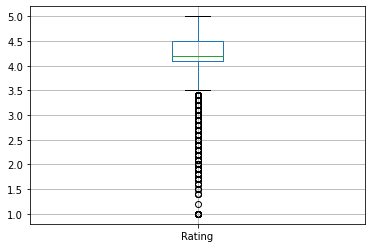

In [36]:
data.boxplot()

In [37]:
data.describe()

,Rating
count,10840.000000
mean,4.191972
std,0.478907
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,5.000000


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

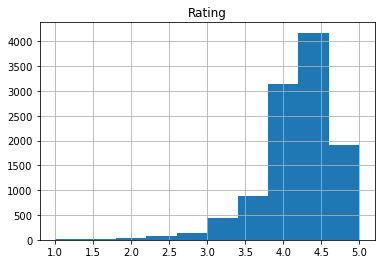

In [38]:
data.hist()

In [41]:
data['Price']=data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))

In [42]:
data['Price']=data['Price'].apply(lambda x:float(x))

In [43]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

In [44]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
data['Installs']=data['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else str(x))

In [55]:
data['Installs']=data['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))

In [56]:
data['Installs']=data['Installs'].apply(lambda x:float(x))

In [57]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191972,4.441529e+05,1.546434e+07,1.027368
std,0.478907,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [60]:
group=data.groupby('Category')
x=group['Rating'].agg(np.mean)
x

Category
ART_AND_DESIGN         4.350462
AUTO_AND_VEHICLES      4.190824
BEAUTY                 4.260882
BOOKS_AND_REFERENCE    4.311026
BUSINESS               4.145987
COMICS                 4.156445
COMMUNICATION          4.163842
DATING                 4.007864
EDUCATION              4.387778
ENTERTAINMENT          4.126174
EVENTS                 4.363647
FAMILY                 4.192394
FINANCE                4.139108
FOOD_AND_DRINK         4.170709
GAME                   4.282506
HEALTH_AND_FITNESS     4.266296
HOUSE_AND_HOME         4.196819
LIBRARIES_AND_DEMO     4.181962
LIFESTYLE              4.112427
MAPS_AND_NAVIGATION    4.065061
MEDICAL                4.190167
NEWS_AND_MAGAZINES     4.142993
PARENTING              4.282223
PERSONALIZATION        4.307603
PHOTOGRAPHY            4.192179
PRODUCTIVITY           4.208287
SHOPPING               4.254052
SOCIAL                 4.248001
SPORTS                 4.218404
TOOLS                  4.066280
TRAVEL_AND_LOCAL       4.119716

In [61]:
y=group['Price'].agg(np.sum)

In [62]:
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

In [63]:
z=group['Reviews'].agg(np.mean)

In [64]:
z

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

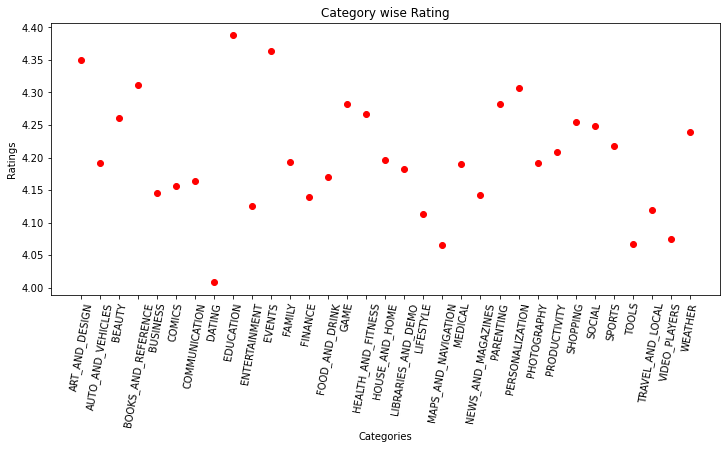

In [68]:
plt.figure(figsize=(12,5))
plt.plot(x,'ro')
plt.title('Category wise Rating')
plt.xlabel('Categories')
plt.ylabel('Ratings')
plt.xticks(rotation=80)
plt.show()

<AxesSubplot:>

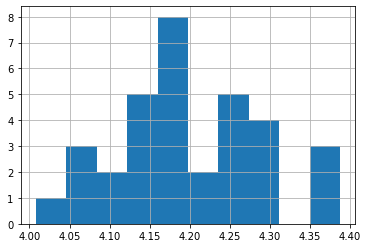

In [66]:
x.hist()

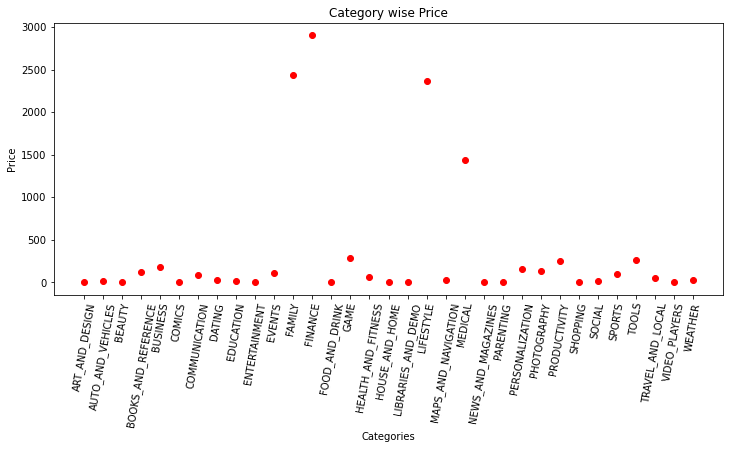

In [69]:
plt.figure(figsize=(12,5))
plt.plot(y,'ro')
plt.title('Category wise Price')
plt.xlabel('Categories')
plt.ylabel('Price')
plt.xticks(rotation=80)
plt.show()

In [72]:
good=data[data['Rating']==5]
good

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100.0,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,1000.0,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10.0,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000.0,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [73]:
good.sort_values(by=['Rating'],ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1.4M,5.0,Free,0.0,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up
8159,CZ Kompas,TOOLS,5.0,2,3.5M,10.0,Free,0.0,Everyone,Tools,"July 9, 2018",1.1,4.0 and up
8230,DB HOME,LIFESTYLE,5.0,5,3.2M,100.0,Free,0.0,Everyone,Lifestyle,"August 31, 2017",1.0.1,4.0 and up
8234,DB Pickles,BUSINESS,5.0,5,14M,100.0,Free,0.0,Everyone,Business,"March 20, 2018",2.0.2,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,BM SPM Practice,FAMILY,5.0,6,9.2M,1000.0,Free,0.0,Everyone,Education,"January 24, 2018",1.0,4.1 and up
6422,BL Flowers Digital,SHOPPING,5.0,21,2.5M,100.0,Free,0.0,Everyone,Shopping,"October 31, 2017",1.6,4.2 and up
6398,BK Gold App,FINANCE,5.0,4,11M,50.0,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up
6604,BP Log lite,LIFESTYLE,5.0,3,1.5M,100.0,Free,0.0,Everyone,Lifestyle,"November 15, 2014",1.1,2.2 and up


In [74]:
data['Rating'].value_counts()

4.193338    1474
4.400000    1109
4.300000    1076
4.500000    1038
4.200000     952
4.600000     823
4.100000     708
4.000000     568
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
3.600000     174
3.500000     163
3.400000     128
3.300000     102
4.900000      87
3.000000      83
3.100000      69
3.200000      64
2.900000      45
2.800000      42
2.600000      25
2.700000      25
2.500000      21
2.300000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      13
2.000000      12
2.100000       8
1.800000       8
1.700000       8
1.600000       4
1.500000       3
1.400000       3
1.200000       1
Name: Rating, dtype: int64

In [75]:
data['Reviews'].value_counts()

0           596
1           272
2           214
3           175
4           137
           ... 
4027          1
137144        1
12215         1
17014705      1
315390        1
Name: Reviews, Length: 6001, dtype: int64

In [76]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
885k                     1
239k                     1
378k                     1
219k                     1
34k                      1
Name: Size, Length: 461, dtype: int64